In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import pandas as pd
from simpledist.distributions import KDE_Distribution

In [53]:
data=np.loadtxt('ppm.txt',usecols=[1,2,3],unpack=True)
bins = data[1]
n = data[0]
b = data[2]

/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


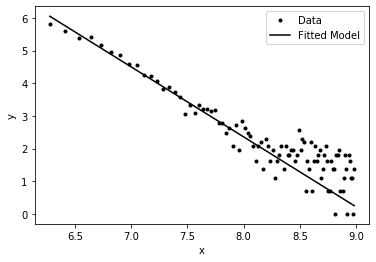

In [40]:
x = np.log(bins)
y = np.log(n)
fit = fitting.LinearLSQFitter()
line_init = models.Linear1D()
# fit the data with the fitter
fitted_line = fit(line_init, x[x<8], y[x<8])

# plot the model
plt.figure()
plt.plot(x, y, 'k.', label='Data')
plt.plot(x, fitted_line(x), 'k-', label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

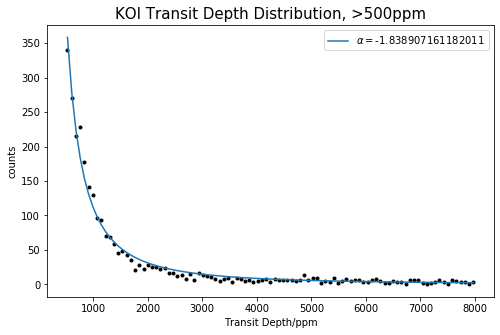

In [65]:
g_init = models.PowerLaw1D(x_0=500,amplitude=100.,alpha=fitted_line.slope.value)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, bins, n)
plt.figure(figsize=(8,5))
plt.plot(bins, n, 'k.')
plt.plot(bins, g(bins), label=r'$\alpha=$'+str(-g.alpha.value))
plt.title('KOI Transit Depth Distribution, >500ppm',fontsize=15)
plt.xlabel('Transit Depth/ppm')
plt.ylabel('counts')
plt.legend(loc=1)


In [151]:
koi = pd.read_csv('kois_cumulative.csv')
koi = koi[(koi.koi_depth>500)&(koi.koi_depth<5000)]
td_kde = KDE_Distribution(np.log10(koi.koi_depth.values),adaptive=False)
sample = 10**td_kde.resample(10000)

In [279]:
from astropy import uncertainty as unc
dis = unc.Distribution(koi.koi_depth)
qua,med,three_quar = dis.pdf_percentiles([25,50,75])




In [196]:
koi = pd.read_csv('cumulative_2020.04.21_22.51.43.csv',skiprows=26)
koi.dropna(subset=['koi_depth'],inplace=True)
koi.reset_index(inplace=True)
koi.drop('index', axis=1, inplace=True)

In [252]:
koi = pd.read_csv('cumulative_koi.csv')
koi

,kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_prad,koi_model_snr,koi_steff,koi_srad,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
0,10797460,K00752.01,CONFIRMED,9.488036,0.146,2.95750,615.8,0.022344,2.26,35.8,5455.0,0.927,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
1,10797460,K00752.02,CONFIRMED,54.418383,0.586,4.50700,874.8,0.027954,2.83,25.8,5455.0,0.927,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648
2,10811496,K00753.01,CANDIDATE,19.899140,0.969,1.78220,10829.0,0.154046,14.60,76.3,5853.0,0.868,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826
3,10848459,K00754.01,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,0.387394,33.46,505.6,5805.0,0.791,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
4,10854555,K00755.01,CONFIRMED,2.525592,0.701,1.65450,603.3,0.024064,2.75,40.9,6031.0,1.046,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,10090151,K07985.01,FALSE POSITIVE,0.527699,1.252,3.22210,1579.2,0.297633,29.35,453.3,5638.0,0.903,14.082,14.082,13.501,13.299,13.177,12.200,11.814,11.756
9197,10128825,K07986.01,CANDIDATE,1.739849,0.043,3.11400,48.5,0.006379,0.72,10.6,6119.0,1.031,14.757,15.189,14.687,14.571,14.484,13.641,13.339,13.261
9198,10147276,K07987.01,FALSE POSITIVE,0.681402,0.147,0.86500,103.6,0.009444,1.07,12.3,6173.0,1.041,15.385,15.853,15.347,15.185,15.158,14.220,13.913,13.844
9199,10155286,K07988.01,CANDIDATE,333.486169,0.214,3.19900,639.1,0.022590,19.30,14.0,4989.0,7.824,10.998,11.733,10.880,10.682,10.578,9.501,9.027,8.921


In [253]:
FGK = koi[koi.koi_steff>4000]
M  = koi[koi.koi_steff<=4000]
print(len(FGK))

8884


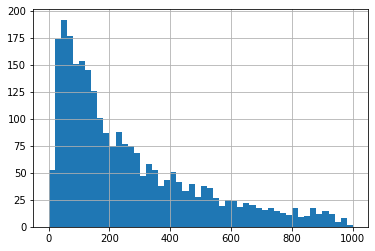

In [313]:
FP.koi_depth.hist(bins=50,range=(0,1e3))

In [314]:
FP = koi[koi.koi_disposition=='FALSE POSITIVE']
FP

,kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_prad,koi_model_snr,koi_steff,koi_srad,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
3,10848459,K00754.01,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,0.387394,33.46,505.6,5805.0,0.791,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809
8,6721123,K00114.01,FALSE POSITIVE,7.361790,1.169,5.02200,233.7,0.183387,39.21,47.7,6227.0,1.958,12.660,12.999,12.609,12.515,12.480,11.659,11.415,11.396
14,10419211,K00742.01,FALSE POSITIVE,11.521446,2.483,3.63990,17984.0,1.625358,150.51,622.1,5795.0,0.848,15.472,15.994,15.419,15.249,15.153,14.248,13.831,13.827
15,10464078,K00743.01,FALSE POSITIVE,19.403938,0.804,12.21550,8918.7,0.096729,7.18,214.7,5043.0,0.680,15.487,16.229,15.440,15.169,14.985,13.950,13.429,13.287
16,10480982,K00744.01,FALSE POSITIVE,19.221389,1.065,4.79843,74284.0,0.476633,49.29,2317.0,6117.0,0.947,15.341,15.798,15.293,15.145,15.053,14.200,13.863,13.727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9194,10205598,K08198.01,FALSE POSITIVE,373.893980,0.963,27.66000,730.0,0.032878,2.51,18.5,5263.0,0.699,14.911,15.534,14.863,14.643,14.487,13.487,13.066,12.926
9195,10031643,K07984.01,FALSE POSITIVE,8.589871,0.765,4.80600,87.7,0.009364,1.11,8.4,5638.0,1.088,14.478,15.064,14.441,14.227,14.144,13.153,12.847,12.724
9196,10090151,K07985.01,FALSE POSITIVE,0.527699,1.252,3.22210,1579.2,0.297633,29.35,453.3,5638.0,0.903,14.082,14.082,13.501,13.299,13.177,12.200,11.814,11.756
9198,10147276,K07987.01,FALSE POSITIVE,0.681402,0.147,0.86500,103.6,0.009444,1.07,12.3,6173.0,1.041,15.385,15.853,15.347,15.185,15.158,14.220,13.913,13.844


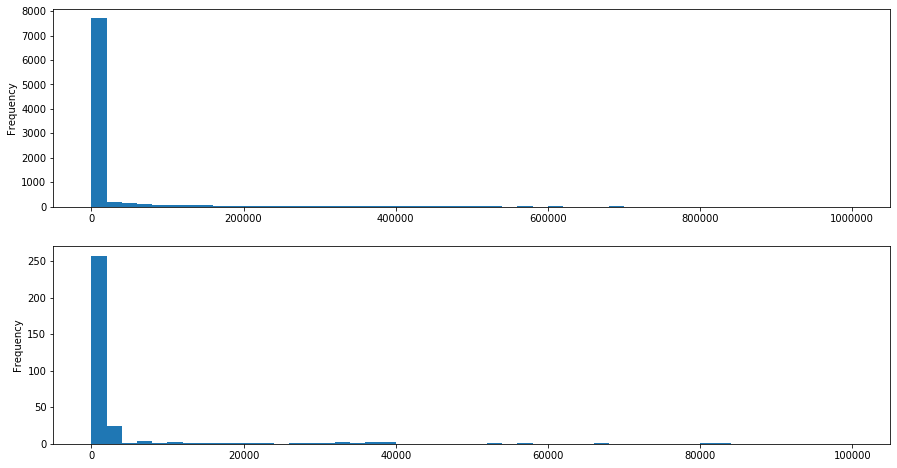

In [268]:
fig, axs = plt.subplots(2,1,figsize=(15,8))
FGK.koi_depth.plot.hist(ax=axs[0],bins=50,range=(0,1000000),label='FGK')
M.koi_depth.plot.hist(ax=axs[1],bins=50,range=(0,100000),label='M')




In [306]:
FGK_KDE = KDE_Distribution(np.log10(FGK.koi_depth[(FGK.koi_depth<50000)&(FGK.koi_depth>500)]),adaptive=False)
M_KDE = KDE_Distribution(np.log10(M.koi_depth[(M.koi_depth<10000)&(M.koi_depth>500)]),adaptive=False)

(array([182.,  76.,  19.,   5.,   1.,   0.,   3.,   1.,   1.,   0.,   0.,
          2.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,
          1.,   1.,   0.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.,
        16000., 17000., 18000., 19000., 20000., 21000., 22000., 23000.,
        24000., 25000., 26000., 27000., 28000., 29000., 30000., 31000.,
        32000., 33000., 34000., 35000., 36000., 37000., 38000., 39000.,
        40000., 41000., 42000., 43000., 44000., 45000., 46000., 47000.,
        48000., 49000., 50000.]),
 <a list of 50 Patch objects>)

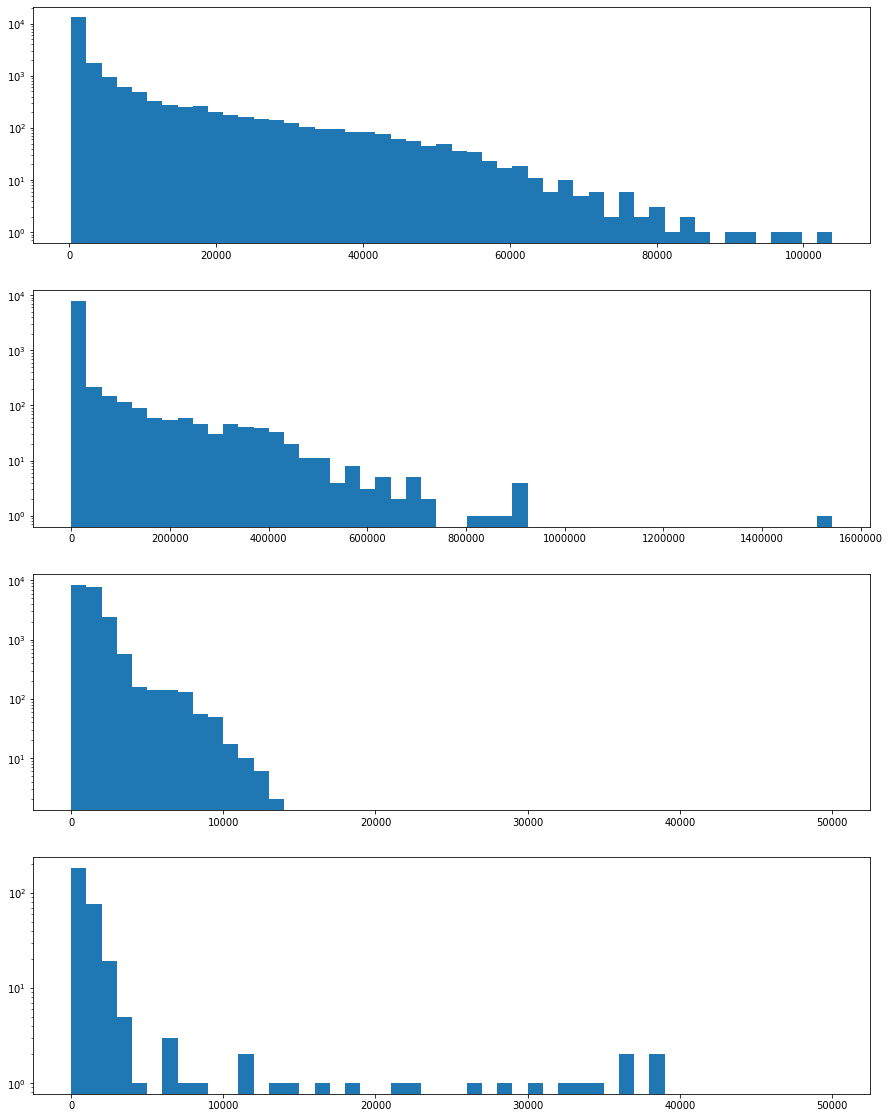

In [307]:
fig, axs = plt.subplots(4,1,figsize=(15,20))
for ax in axs:
    ax.set_yscale('log')
axs[0].hist(10**FGK_KDE.resample(2e4),bins=50)

axs[1].hist(FGK.koi_depth,bins=50)

axs[2].hist(10**M_KDE.resample(2e4),bins=50,range=(0,5e4))

axs[3].hist(M.koi_depth,bins=50,range=(0,5e4))
